### Short recap on important statistical principles

In [79]:
# Some imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import tensorflow_probability as tfp

#To make ploting consitent
sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)

%matplotlib inline
plt.style.use('default')
np.random.seed(42)

### The car example

The pdf of the car example. 

Text(0, 0.5, 'p(x) (density)')

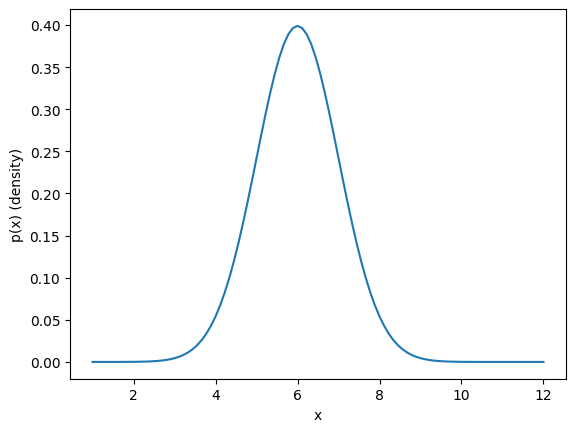

In [88]:
from scipy.stats import norm
dist = norm(loc=6,scale=1)
xv=np.linspace(1,12,100)
plt.plot(xv, dist.pdf(xv))
plt.xlabel('x')
plt.ylabel('p(x) (density)')

Sampling from the model

(array([1., 3., 0., 0., 2., 1., 1., 0., 0., 2.]),
 array([5.53052561, 5.73539433, 5.94026305, 6.14513177, 6.35000049,
        6.55486921, 6.75973793, 6.96460666, 7.16947538, 7.3743441 ,
        7.57921282]),
 <a list of 10 Patch objects>)

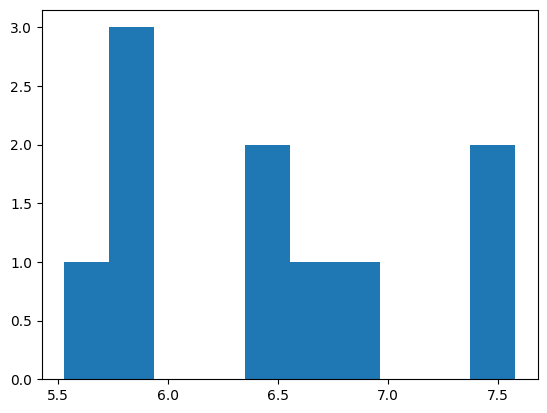

In [81]:
# Repeat several times to see that data varies
x  = np.random.normal(loc=6,scale=1,size=10)
x
plt.hist(x)

Estimation of the parameters

Copy and paste the values

In [82]:
x = np.array([6.27045683, 5.94976189, 5.76105195, 5.09243634, 5.42322867, 6.75539123, 6.50091719, 5.02244476, 6.09933231, 6.75138712]
)

In [83]:
np.mean(x), np.std(x)

(5.962640829, 0.6022245862994148)

### Goodness of estimation

In [84]:
n = 10
runs = 10000
mu = np.zeros(runs)
for i in range(runs):
    x  = np.random.normal(loc=6,scale=1,size=n) #Sampling n 
    mu[i] = np.mean(x) #calculation of the estimate

In [85]:
x[0:7] #Different values for different runs

array([7.03059459, 4.84464523, 6.57543719, 5.38076154, 5.67259719,
       6.04760427, 5.88050895])

In [86]:
np.mean(mu) #Unbiased for n-->inf you get the true value 6

6.000924784675382

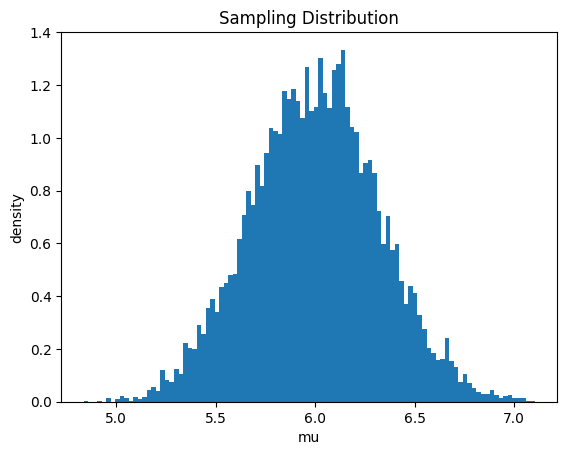

In [87]:
plt.hist(mu,100, density=True)
plt.xlabel('mu')
plt.ylabel('density')
plt.title('Sampling Distribution')
plt.show()

### Little Exercise

Change n from 10 to larger values, what do you expect?